# Breast Cancer Pred

In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
from IPython.display import Image


In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [4]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
import tensorflow.keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD


# Data 불러오기

* 569개의 데이터   
 - id, 진단 결과, 검진항목 30개    
 - 주로 ML에서 knn의 예제로 주로 활용이 됨!!   

![Column_Contents](img/img_01.png)

In [5]:
df = pd.read_csv("data/data.csv")
print(df.shape)

(569, 33)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# 전처리

 - id 컬럼 제거(의미 없어서,,단순 id)   
 - Unnamed: 32컬럼 제거(값이 없어서...) : 컬럼 이름에서 공란 등에 유의!

In [7]:
# 전처리
df.drop(['id'], axis=1, inplace=True)
df.drop(['Unnamed: 32'], axis=1, inplace=True)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

# 간단하게 컬럼에 대한 각기 히스토그램& Scatter plot 그려보기

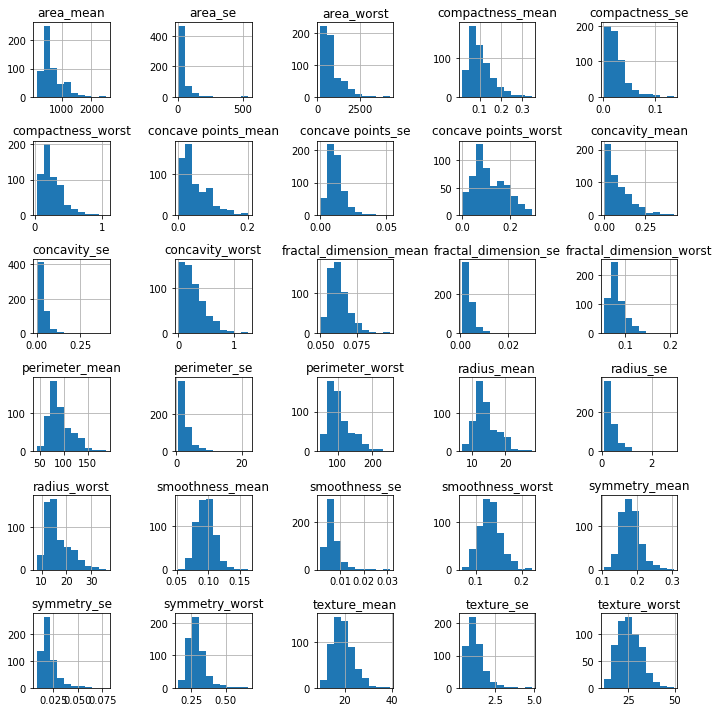

In [8]:
# Plot histograms for each variable


df.hist(figsize = (10, 10))
plt.tight_layout()
plt.show()

C:\dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  after removing the cwd from sys.path.


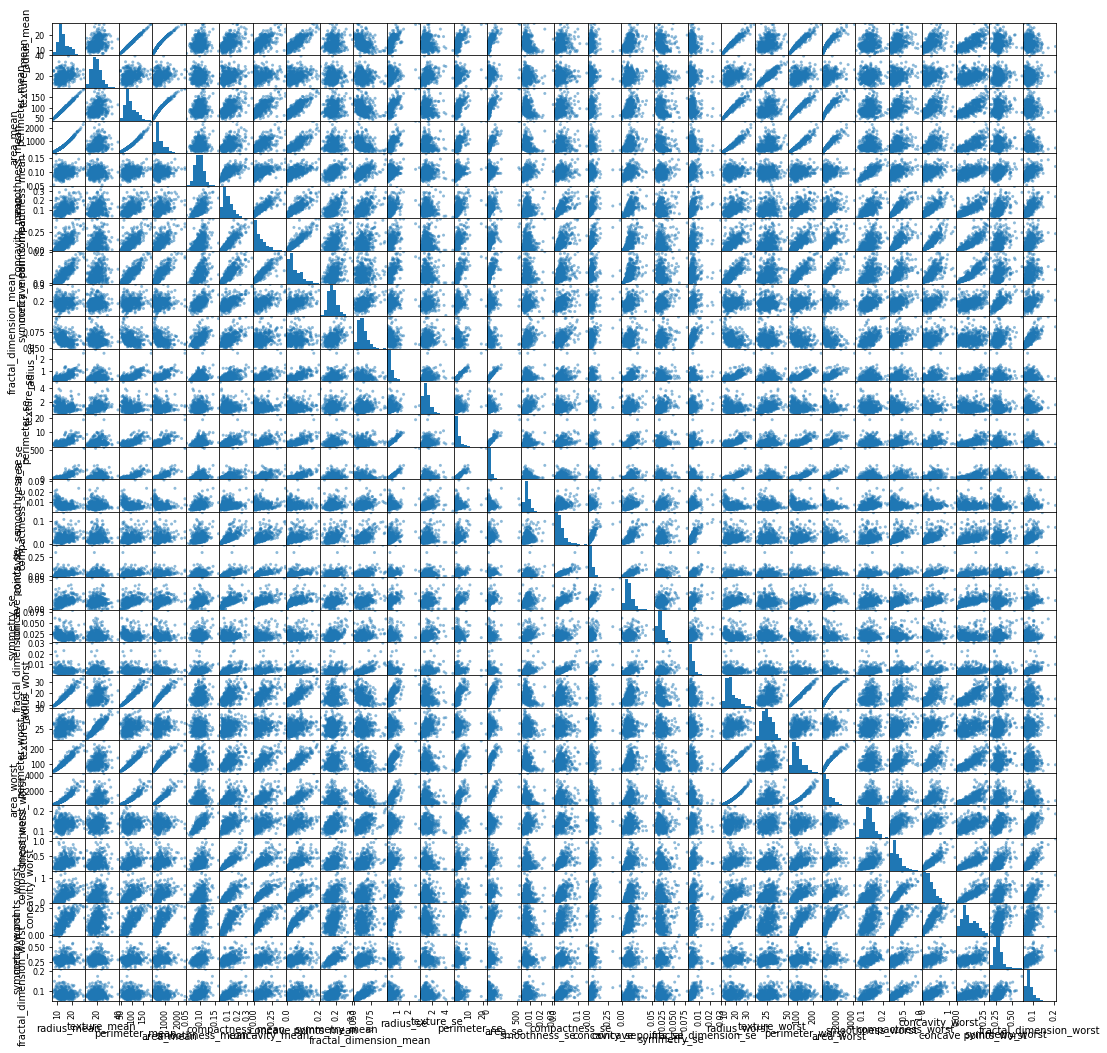

In [9]:
# Create scatter plot matrix

scatter_matrix(df, figsize = (18,18))
plt.tight_layout()
plt.show()

#   데이터 분리 : Feature, Traget --> Target의 종류 및 수량 확인

In [11]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
np.unique(y)

array(['B', 'M'], dtype=object)

In [12]:
np.unique(y, return_counts=True)

(array(['B', 'M'], dtype=object), array([357, 212], dtype=int64))

# 단순 전처리!!

### 단순 전처리 --> target encoding

In [13]:
# from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)
np.unique(y, return_counts=True)

(array([0, 1]), array([357, 212], dtype=int64))

### 단순 전처리 --> train_test split

In [14]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

### 단순 전처리 --> standardScaler적용

In [16]:
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Classfication Model

### 01) svm simple

In [17]:
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.958041958041958


### 02) knn simple

In [23]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9440559440559441


* one-hot-encoding

In [24]:
y_train_ohe  = tf.keras.utils.to_categorical(y_train , num_classes=2)
y_test_ohe  = tf.keras.utils.to_categorical(y_test , num_classes=2)
print(y_train_ohe[0])
print(y_test_ohe[0])

[1. 0.]
[1. 0.]


In [25]:
X_train.shape

(426, 30)

In [28]:
# dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
dataset_train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset_train

<TensorSliceDataset shapes: ((30,), ()), types: (tf.float64, tf.int32)>

In [29]:
for feat, targ in dataset_train.take(5):
    print ('Features: {}, Target: {}'.format(feat, targ))

Features: [ 0.56834943 -0.7455382   0.58009089  0.37053367  0.16248975  0.75051504
 -0.29232688  0.12077331  0.64546786  0.42409254 -0.8459362  -1.33183264
 -0.76246363 -0.59518062 -0.83573848 -0.40831834 -0.39989516  0.02644473
 -0.13791584 -0.04101054  0.13524938 -1.06324969  0.15967859 -0.0411782
 -0.41416553 -0.0124391  -0.31116881  0.14461744  0.39847515  0.28446451], Target: 0
Features: [-0.28961453 -0.14718352 -0.26447524 -0.35755004  1.3705287   0.35627046
  0.40744592  0.62125191  1.15404923  0.71471915 -0.4349292  -0.59897155
 -0.48949416 -0.37623321 -0.18336028 -0.12288072 -0.10165446  0.05631866
 -0.37842054 -0.06070741 -0.13701334  0.34997575 -0.14949267 -0.22447494
  1.96801062  0.97681458  1.02736027  1.41557963  1.61872573  1.78132724], Target: 1
Features: [-0.48980612 -0.45906723 -0.49432026 -0.51383425 -0.51401207 -0.53506513
 -0.67184353 -0.65917995 -1.06454487 -0.3216128  -0.92368442 -0.80305715
 -0.8102831  -0.66550634 -1.06610348 -0.64854351 -0.58903103 -0.7383277

In [22]:
# dataset_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
# dataset_test

<TensorSliceDataset shapes: ((30,), ()), types: (tf.float64, tf.int64)>

In [30]:
dnn_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu', input_shape=(30,)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='softmax'),
    
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(X_train, y_train_ohe,epochs=15 )

#model.fit(tf.data.Dataset.from_tensor_slices(X_train),y_train, epochs=20, validation_data=(tf.data.Dataset.from_tensor_slices(X_test),y_test))

#dnn_model.fit(dataset_train, epochs=20, validation_data=dataset_test)
# dnn_model.fit(tf.data.Dataset.from_tensor_slices(X_train),tf.data.Dataset.from_tensor_slices(y_train),epochs=20)

Train on 426 samples
Epoch 1/15
426/426 [==============================] - 1s 2ms/sample - loss: 0.4090 - accuracy: 0.8967
Epoch 2/15
426/426 [==============================] - 0s 75us/sample - loss: 0.0989 - accuracy: 0.9671
Epoch 3/15
426/426 [==============================] - 0s 68us/sample - loss: 0.0535 - accuracy: 0.9765
Epoch 4/15
426/426 [==============================] - 0s 66us/sample - loss: 0.0351 - accuracy: 0.9906
Epoch 5/15
426/426 [==============================] - 0s 68us/sample - loss: 0.0226 - accuracy: 0.9930
Epoch 6/15
426/426 [==============================] - 0s 68us/sample - loss: 0.0249 - accuracy: 0.9930
Epoch 7/15
426/426 [==============================] - 0s 68us/sample - loss: 0.0202 - accuracy: 0.9883
Epoch 8/15
426/426 [==============================] - 0s 68us/sample - loss: 0.0302 - accuracy: 0.9883
Epoch 9/15
426/426 [==============================] - 0s 68us/sample - loss: 0.0140 - accuracy: 0.9977
Epoch 10/15
426/426 [==============================] 

In [31]:
dnn_model.evaluate(X_test, y_test_ohe, verbose=2)

143/1 - 0s - loss: 0.1577 - accuracy: 0.9650


[0.22766504815773114, 0.96503496]

*** DNN을 활용하여 모델의 성능을 올리게 됨!!!

# 모델의 epoch를 하면서 중간 중간 모델의 weight를 저장을 하자!!!

* ref) https://www.tensorflow.org/tutorials/keras/save_and_load

### 01) epoch 할 때 마다 하나의 파일에 업데이트를 하면서 최종을 기록할 때.. --> 단, 불러서 사용할 때 모델은 정확하게 학습한 모델과 완전히!!!! 동일!!! 해야 함!!!!!  --> 주의!!!) model의 compile까지 해야함!!!!

In [32]:
import os

In [33]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 체크포인트 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


# dnn_model.fit(X_train, y_train_ohe,epochs=15 ,callbacks = [cp_callback]) 만 하게 되면...
# 참고로 위에서 학습하고 다시 또 돌리면 epoch가 다시 추가해서 돌리게 되므로 결과가 다르고, 더 돌리는 결과과 됨;;;
# 위에서 돌린 epoch +  지금 또 돌린 epoch 

# 그래서 다시 위에와 동일하게 하기 위해서..처음부터 다시...
dnn_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu', input_shape=(30,)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='softmax'),
    
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# callbacks 추가
dnn_model.fit(X_train, y_train_ohe,epochs=15 ,callbacks = [cp_callback])

Train on 426 samples
Epoch 1/15
416/426 [============================>.] - ETA: 0s - loss: 0.3649 - accuracy: 0.8918
Epoch 00001: saving model to training_1/cp.ckpt
426/426 [==============================] - 4s 9ms/sample - loss: 0.3582 - accuracy: 0.8944
Epoch 2/15
256/426 [=================>............] - ETA: 0s - loss: 0.1206 - accuracy: 0.9531
Epoch 00002: saving model to training_1/cp.ckpt
426/426 [==============================] - 0s 759us/sample - loss: 0.0884 - accuracy: 0.9671
Epoch 3/15
352/426 [=======================>......] - ETA: 0s - loss: 0.0500 - accuracy: 0.9886
Epoch 00003: saving model to training_1/cp.ckpt
426/426 [==============================] - 0s 763us/sample - loss: 0.0453 - accuracy: 0.9906
Epoch 4/15
192/426 [============>.................] - ETA: 0s - loss: 0.0233 - accuracy: 0.9896
Epoch 00004: saving model to training_1/cp.ckpt
426/426 [==============================] - 0s 506us/sample - loss: 0.0380 - accuracy: 0.9883
Epoch 5/15
384/426 [=============

In [34]:
dnn_model.evaluate(X_test, y_test_ohe,verbose=2)

143/1 - 0s - loss: 0.2313 - accuracy: 0.9650


[0.26665735633887505, 0.96503496]

* 위에서 학습한 맨 마지막의 결과에 대한 가중치를 그대로 불러와서 사용을 한다!!! 단, 주의할 점은 compile까지 해야함!!!

In [35]:
dnn_model_2 = tf.keras.Sequential([
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu', input_shape=(30,)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='softmax'),
    
])
# 주의!!! 모델 구조 + compile 까지 완전히 동일해야 함!!!!!
dnn_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [36]:
dnn_model_2.load_weights(checkpoint_path)
dnn_model_2.evaluate(X_test, y_test_ohe, verbose=2)

143/1 - 0s - loss: 0.2313 - accuracy: 0.9650


[0.26665735633887505, 0.96503496]

## 매 epoch마다 저장을 해서, 필요한 때의 값을 가지고 와서 할 때...

In [37]:
# 파일 이름에 에포크 번호를 포함시킵니다(`str.format` 포맷)
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True)



# 그래서 다시 위에와 동일하게 하기 위해서..처음부터 다시...
dnn_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu', input_shape=(30,)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='softmax'),
    
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

###########
# 추가된 부분!!! --> 초기 값을 저장을 함...
dnn_model.save_weights(checkpoint_path.format(epoch=0))
##########

dnn_model.fit(X_train, y_train_ohe,epochs=15 ,callbacks = [cp_callback])





Train on 426 samples
Epoch 1/15
320/426 [=====================>........] - ETA: 0s - loss: 0.4688 - accuracy: 0.8344 
Epoch 00001: saving model to training_2/cp-0001.ckpt
426/426 [==============================] - 2s 4ms/sample - loss: 0.4021 - accuracy: 0.8685
Epoch 2/15
288/426 [===================>..........] - ETA: 0s - loss: 0.1006 - accuracy: 0.9653
Epoch 00002: saving model to training_2/cp-0002.ckpt
426/426 [==============================] - 0s 840us/sample - loss: 0.0862 - accuracy: 0.9742
Epoch 3/15
352/426 [=======================>......] - ETA: 0s - loss: 0.0497 - accuracy: 0.9858
Epoch 00003: saving model to training_2/cp-0003.ckpt
426/426 [==============================] - 0s 663us/sample - loss: 0.0486 - accuracy: 0.9859
Epoch 4/15
352/426 [=======================>......] - ETA: 0s - loss: 0.0441 - accuracy: 0.9886
Epoch 00004: saving model to training_2/cp-0004.ckpt
426/426 [==============================] - 0s 723us/sample - loss: 0.0401 - accuracy: 0.9883
Epoch 5/15
 

In [38]:
dnn_model.evaluate(X_test, y_test_ohe,verbose=2)

143/1 - 0s - loss: 0.1309 - accuracy: 0.9720


[0.21673326618266064, 0.97202796]

* 맨 마지막의 가중치를 가지고 올 때....

In [40]:
dnn_model_3 = tf.keras.Sequential([
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu', input_shape=(30,)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='softmax'),
    
])
# 주의!!! 모델 구조 + compile 까지 완전히 동일해야 함!!!!!
dnn_model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
# 여러 epoch중에서 맨 마지막을 가지고 오고, 그 뒤에 더  epoch를 돌리면서 더 학습을 할 때에...
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2\\cp-0015.ckpt'

In [42]:
dnn_model_3.load_weights(latest)
dnn_model_3.evaluate(X_test, y_test_ohe, verbose=2)

143/1 - 0s - loss: 0.1309 - accuracy: 0.9720


[0.21673326618266064, 0.97202796]

* 여러번 수행한 epoch 중에서 특정한 경우에 대한 것을 가지고 올 때..

In [47]:
# 여러 epoch중에서 acc가 0.99에서 거의 유지될 때 의 가중치를 가지고 오고 싶을 때...
# 그 떄는 training_2/cp-0006.ckpt
sepcific_checkpoint_path = "training_2/cp-0015.ckpt"


dnn_model_4 = tf.keras.Sequential([
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu', input_shape=(30,)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='softmax'),
    
])
# 주의!!! 모델 구조 + compile 까지 완전히 동일해야 함!!!!!
dnn_model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



dnn_model_4.load_weights(sepcific_checkpoint_path)
dnn_model_4.evaluate(X_test, y_test_ohe, verbose=2)

143/1 - 0s - loss: 0.1309 - accuracy: 0.9720


[0.21673326618266064, 0.97202796]

In [70]:
# 파일 이름에 에포크 번호를 포함시킵니다(`str.format` 포맷)
checkpoint_path = "training_4/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=1, save_weights_only=True)



# 그래서 다시 위에와 동일하게 하기 위해서..처음부터 다시...
dnn_model_5 = tf.keras.Sequential([
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='elu', input_shape=(30,)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='elu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='elu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='elu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='elu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='softmax'),
    
])

dnn_model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

###########
# 추가된 부분!!! --> 초기 값을 저장을 함...
dnn_model_5.save_weights(checkpoint_path.format(epoch=0))
##########

dnn_model_5.fit(X_train, y_train_ohe,epochs=50 ,callbacks = [cp_callback])



Train on 426 samples
Epoch 1/50
416/426 [============================>.] - ETA: 0s - loss: 0.1628 - accuracy: 0.9159
Epoch 00001: saving model to training_4/cp-0001.ckpt
426/426 [==============================] - 4s 9ms/sample - loss: 0.1594 - accuracy: 0.9178
Epoch 2/50
416/426 [============================>.] - ETA: 0s - loss: 0.0409 - accuracy: 0.9880
Epoch 00002: saving model to training_4/cp-0002.ckpt
426/426 [==============================] - 0s 1ms/sample - loss: 0.0580 - accuracy: 0.9836
Epoch 3/50
384/426 [==========================>...] - ETA: 0s - loss: 0.0530 - accuracy: 0.9818
Epoch 00003: saving model to training_4/cp-0003.ckpt


426/426 [==============================] - 0s 739us/sample - loss: 0.0505 - accuracy: 0.9812
Epoch 4/50
416/426 [============================>.] - ETA: 0s - loss: 0.0301 - accuracy: 0.9928
Epoch 00004: saving model to training_4/cp-0004.ckpt
426/426 [==============================] - 0s 852us/sample - loss: 0.0303 - accuracy: 0.9930
Epoch 5/50
384/426 [==========================>...] - ETA: 0s - loss: 0.0187 - accuracy: 0.9896
Epoch 00005: saving model to training_4/cp-0005.ckpt
426/426 [==============================] - 0s 801us/sample - loss: 0.0427 - accuracy: 0.9859
Epoch 6/50
352/426 [=======================>......] - ETA: 0s - loss: 0.0225 - accuracy: 0.9943
Epoch 00006: saving model to training_4/cp-0006.ckpt
426/426 [==============================] - 0s 1ms/sample - loss: 0.0240 - accuracy: 0.9930
Epoch 7/50
 32/426 [=>............................] - ETA: 0s - loss: 0.0243 - accuracy: 1.0000
Epoch 00007: saving model to training_4/cp-0007.ckpt
426/426 [=========================

In [57]:
sepcific_checkpoint_path = "training_3/cp-0040.ckpt"


dnn_model_6 = tf.keras.Sequential([
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='elu', input_shape=(30,)),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='elu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='elu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='elu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='softmax'),
    
])
# 주의!!! 모델 구조 + compile 까지 완전히 동일해야 함!!!!!
dnn_model_6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



dnn_model_6.load_weights(sepcific_checkpoint_path)
dnn_model_6.evaluate(X_test, y_test_ohe, verbose=2)

143/1 - 0s - loss: 0.1172 - accuracy: 0.9790


[0.1929886244901723, 0.97902095]

In [ ]:
tf.keras.layers.